In [1]:
%matplotlib inline
from pylab import *
rcParams['font.size'] = 15
rcParams['legend.fontsize'] = 12

# Set up paths
inputs = eval(open("../inputs.txt").read())
sys.path.insert(0, inputs['CRANE_dir']+'/02_Inference')


self.Offset_A.shape (2, 56)
self.Offset.shape (2, 56, 6)
self.Tau.shape (2, 56, 6)
56 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56]
self.Mean_Matrix.shape (2, 56, 6)
self.MeanSquare_Matrix.shape (2, 56, 6)


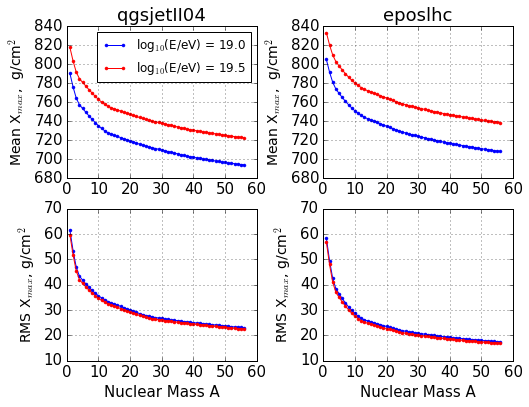

In [2]:
from Xmax import Xmax_modeler

log10_Energy_array = np.array([19.0, 19.1, 19.2, 19.3, 19.4, 19.5]) # lower energy bins
xmm = Xmax_modeler(log10_Energy_array)

plt.figure(figsize=(8,6))
cols = ['b', 'r']

for ie in [0, 5]:
    ax1 = plt.subplot(221)
    ax1.plot((xmm.A_array), xmm.Mean_Matrix[0,:,ie], '.-', label=r'log$_{10}$(E/eV) = %1.1f'%xmm.log10_Energy_array[ie], color=cols[ie%2])
    plt.ylabel(r'Mean X$_{max}$,  g/cm$^2$', fontsize=14)
    #plt.xlabel('Nuclear Mass A')
    plt.grid(True)
    plt.title(xmm.model[0])
    plt.legend(loc=1)
    ax3 = plt.subplot(223)
    plt.plot((xmm.A_array), np.sqrt(xmm.MeanSquare_Matrix[0,:,ie] - xmm.Mean_Matrix[0,:,ie]**2), '.-', label=r'log$_{10}$(E/eV) = %1.1f'%xmm.log10_Energy_array[ie], color=cols[ie%2])
    plt.xlabel('Nuclear Mass A')
    plt.ylabel(r'RMS X$_{max}$, g/cm$^2$', fontsize=14)
    plt.grid(True)
    
    ax2 = plt.subplot(222, sharey=ax1)
    plt.plot((xmm.A_array), xmm.Mean_Matrix[1,:,ie], '.-', label=r'log$_{10}$(E/eV) = %1.1f'%xmm.log10_Energy_array[ie], color=cols[ie%2])
    plt.ylabel(r'Mean X$_{max}$,  g/cm$^2$', fontsize=14)
    #plt.xlabel('Nuclear Mass A')
    plt.grid(True)
    plt.title(xmm.model[1])
    ax4 = plt.subplot(224, sharey=ax3)
    plt.plot((xmm.A_array), np.sqrt(xmm.MeanSquare_Matrix[1,:,ie] - xmm.Mean_Matrix[1,:,ie]**2), '.-', label=r'log$_{10}$(E/eV) = %1.1f'%xmm.log10_Energy_array[ie], color=cols[ie%2])
    plt.xlabel('Nuclear Mass A')
    plt.ylabel(r'RMS X$_{max}$, g/cm$^2$', fontsize=14)
    plt.grid(True)
    plt.subplots_adjust(wspace=0.35)


Proton Fraction 0.67


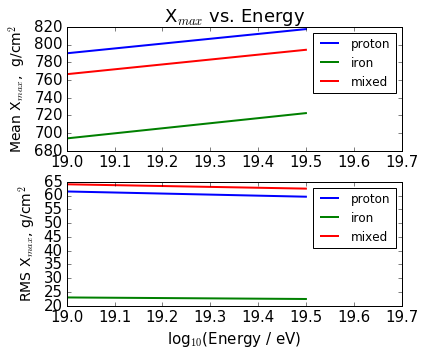

In [3]:
plt.figure(figsize=(6,5))
f_A_array = np.zeros(len(xmm.A_array))
f_A_array[0] = 1.
Mean, RMS = xmm.getMeanRMS(f_A_array)
plt.subplot(211)
plt.plot(xmm.log10_Energy_array, Mean[0,:], lw=2, label='proton')
plt.subplot(212)
plt.plot(xmm.log10_Energy_array, RMS[0,:], lw=2, label='proton')

f_A_array = np.zeros(len(xmm.A_array))
f_A_array[-1] = 1.
Mean, RMS = xmm.getMeanRMS(f_A_array)
plt.subplot(211)
plt.plot(xmm.log10_Energy_array, Mean[0,:], lw=2, label='iron')
plt.subplot(212)
plt.plot(xmm.log10_Energy_array, RMS[0,:], lw=2, label='iron')

f_A_array = np.random.uniform(0.,1.,len(xmm.A_array))
f_A_array[0] = 60.
#f_A_array[-1] = 100. - f_A_array[0]
f_A_array /= np.sum(f_A_array)
#print f_A_array
print 'Proton Fraction %1.2f'%f_A_array[0]
Mean, RMS = xmm.getMeanRMS(f_A_array)
plt.subplot(211)
plt.plot(xmm.log10_Energy_array, Mean[0,:], lw=2, label='mixed')
plt.ylabel(r'Mean X$_{max}$,  g/cm$^2$', fontsize=14)
plt.legend()
plt.xlim(19., 19.7)
title('X$_{max}$ vs. Energy')

plt.subplot(212)
plt.plot(xmm.log10_Energy_array, RMS[0,:], lw=2, label='mixed')

plt.xlabel('log$_{10}$(Energy / eV)')
plt.ylabel(r'RMS X$_{max}$, g/cm$^2$', fontsize=14)
plt.xlim(19., 19.7)
plt.legend()
plt.subplots_adjust(hspace=0.25)


proton fraction 0.0
proton fraction 0.1
proton fraction 0.2
proton fraction 0.3
proton fraction 0.4
proton fraction 0.5
proton fraction 0.6
proton fraction 0.7
proton fraction 0.8
proton fraction 0.9
proton fraction 1.0


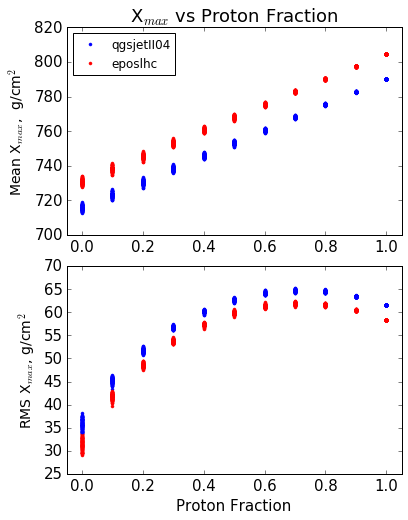

In [4]:
plt.figure(figsize=(6,8))
count=0
for prot_frac in np.arange(0.,1.1,0.1):
    print 'proton fraction', prot_frac
    for k in range(0,100):
        count+=1
        f_A_array = np.random.uniform(0.,1.,len(xmm.A_array))
        f_A_array[0] = prot_frac*np.sum(f_A_array)
        f_A_array[1:] *= (1.-prot_frac)
        f_A_array /= np.sum(f_A_array)
        #print prot_frac, f_A_array[0]
        #print f_A_array
        Mean, RMS = xmm.getMeanRMS(f_A_array)
        plt.subplot(211)
        if(count==1):
            p1, = plt.plot([prot_frac], [Mean[0,0]], 'b.', label = xmm.model[0])
            p2, = plt.plot([prot_frac], [Mean[1,0]], 'r.', label = xmm.model[1])
        if(count>1):
            p1, = plt.plot([prot_frac], [Mean[0,0]], 'b.')
            p2, = plt.plot([prot_frac], [Mean[1,0]], 'r.')
        plt.ylabel(r'Mean X$_{max}$,  g/cm$^2$', fontsize=14)

        plt.xlim(-0.05,1.05)
        plt.subplot(212)
        plt.plot([prot_frac], [RMS[0,0]], 'b.')
        plt.plot([prot_frac], [RMS[1,0]], 'r.')
        #plt.legend()
        plt.xlim(-0.05,1.05)
        plt.xlabel('Proton Fraction')
        plt.ylabel(r'RMS X$_{max}$, g/cm$^2$', fontsize=14)
        plt.subplots_adjust(hspace=0.15)
        #plt.xlim(19., 19.7)
        #plt.legend()
subplot(211)
plt.legend(loc=2, numpoints=1)
title('X$_{max}$ vs Proton Fraction')